## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## Data import and processing

In [2]:
# load data to a pandas DataFrame
df = pd.read_csv("ML_Project_LaptopPrice.csv")

In [3]:
# print first 5 rows
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# check number of rows and columns
df.shape

(1303, 12)

In [5]:
# get some info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# check duplicated values
df.duplicated().sum()

0

In [7]:
# check for missing values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# drop frist column
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Data cleanup

In [10]:
# From Ram column let's remove GB
# From Weight column let's remove kg
df["Ram"] = df["Ram"].str.replace("GB","")
df["Weight"] = df["Weight"].str.replace("kg","")

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
# we need to change column datatype and convert it to numbers  (ram and weight)
df["Ram"] = df["Ram"].astype("int32")
df["Weight"] = df["Weight"].astype("float32")

In [13]:
# let's check if they were updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

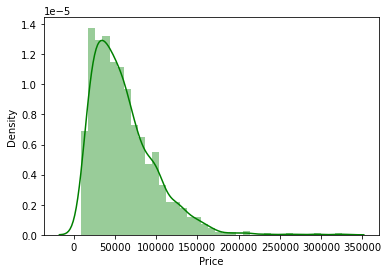

In [14]:
# let's check the distrubion of price column
sns.distplot(df["Price"], color="g")

<AxesSubplot:>

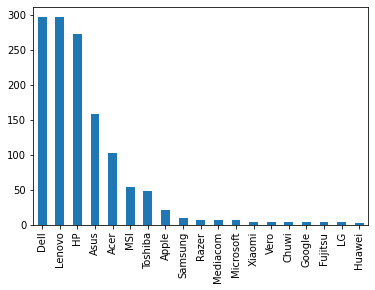

In [15]:
# let's check the distrubion of Company column.
# Since ii is a Categorical data let's use value counts
df["Company"].value_counts().plot(kind = "bar")

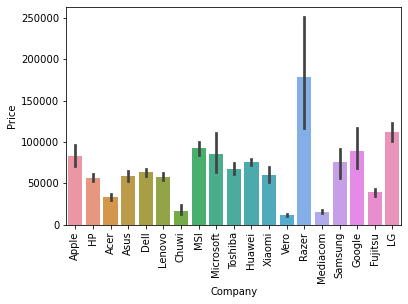

In [16]:
# and if we compare both values together
sns.barplot(x= df["Company"], y =df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<AxesSubplot:>

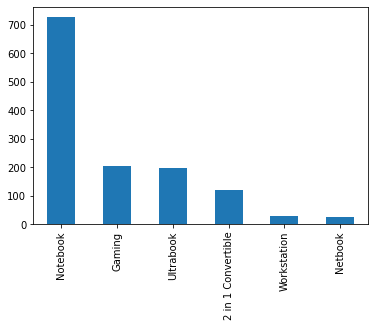

In [17]:
# If we check TypeName column
df["TypeName"].value_counts().plot(kind = "bar")

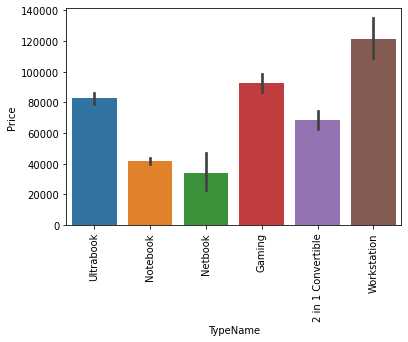

In [18]:
# and if we compare both TypeName and Price values together
sns.barplot(x= df["TypeName"], y =df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

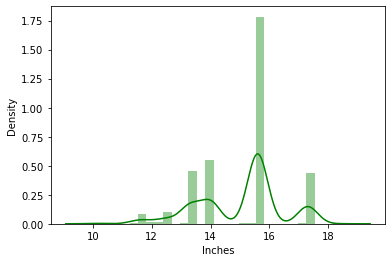

In [19]:
# let's check inches values 
sns.distplot(df["Inches"], color="g")

<AxesSubplot:xlabel='Inches', ylabel='Price'>

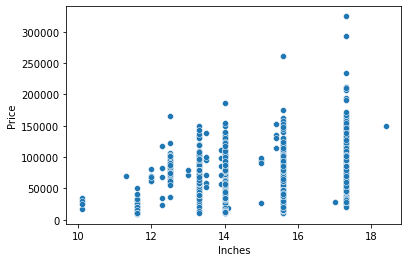

In [20]:
# and if we compare both Inches and Price values together
sns.scatterplot(x= df["Inches"], y =df["Price"])

In [21]:
# For Screen Resolution we have multiple options. 
# Let's check the value distrubition
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [22]:
# Touchscreen values will be represented by 1 and 0, where 1 is touchscreen and 0 else
# Let's add a new column with the following lambda function
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [23]:
# Let's check with 5 random values from the list
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1079,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,2.31,50083.200,0
730,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,103096.800,0
584,Dell,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.26,15717.600,0
1043,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,55922.688,0
207,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21,103842.720,1


<AxesSubplot:>

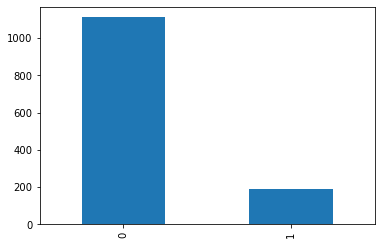

In [24]:
df["Touchscreen"].value_counts().plot(kind="bar")

In [25]:
# Let's add a new column based on the IPS value of the screen
df["Ips"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

In [26]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
546,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.87,41824.80,0,0
742,Toshiba,Notebook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.25,81784.80,1,1
234,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.60,36709.92,1,1
60,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,69210.72,0,0
554,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,68198.40,0,0


<AxesSubplot:>

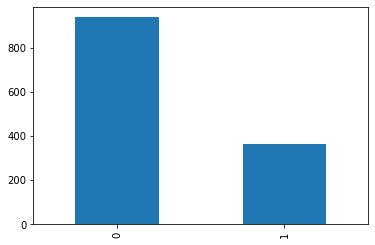

In [27]:
# let's check the value distrubtion of IPS
df["Ips"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Ips', ylabel='Price'>

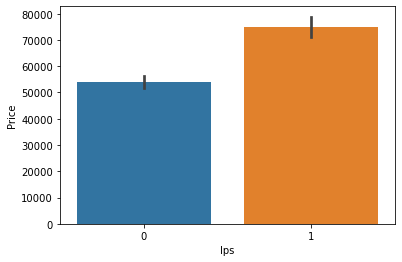

In [28]:
# and comparre it with price value
sns.barplot(x=df["Ips"], y=df["Price"])

In [29]:
# let's try to get some values from the screen resolution
new = df["ScreenResolution"].str.split("x",n=1, expand=True)

In [30]:
df["X res"] = new[0]
df["Y res"] = new[1]

In [31]:
df["X res"].value_counts()

Full HD 1920                                507
1366                                        281
IPS Panel Full HD 1920                      231
IPS Panel Full HD / Touchscreen 1920         53
Full HD / Touchscreen 1920                   47
1600                                         23
Touchscreen 1366                             16
Quad HD+ / Touchscreen 3200                  15
IPS Panel 4K Ultra HD 3840                   12
IPS Panel 4K Ultra HD / Touchscreen 3840     11
4K Ultra HD / Touchscreen 3840               10
4K Ultra HD 3840                              7
Touchscreen 2560                              7
IPS Panel 1366                                7
IPS Panel Quad HD+ / Touchscreen 3200         6
IPS Panel Retina Display 2560                 6
IPS Panel Retina Display 2304                 6
Touchscreen 2256                              6
IPS Panel Touchscreen 2560                    5
IPS Panel Retina Display 2880                 4
IPS Panel Touchscreen 1920              

In [32]:
# no we have to split the values of the X var to pick just the resolution. 
# Let's split the string and pick the last value
new_split =  df["X res"].str.split()

In [33]:
lst =[i[-1] for i in new_split]

In [34]:
df["X res"] = lst

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X res,Y res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
# let's convert the values to integers
df["X res"] = df["X res"].astype("int")
df["Y res"] = df["Y res"].astype("int")

In [37]:
# and check if the values are integers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X res             1303 non-null   int32  
 14  Y res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [38]:
# if we check now how the price column values correlates to other columns
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X res          0.556529
Y res          0.552809
Name: Price, dtype: float64

In [39]:
# Since we have X and Y resolution we can define the ppi and then get rid of the two columns
df["ppi"] = (((df["X res"]**2) + (df["Y res"]**2))**0.5/ df["Inches"]).astype("float")

In [40]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X res          0.556529
Y res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [41]:
# Now we can get rid of the screen resolutiom Inches, X res, Y res
df.drop(columns=["ScreenResolution","Inches","X res","Y res"], inplace=True)

In [42]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [43]:
# Let's check no for CPU value distrubition
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [44]:
# let's split the processor values
df["Cpu name"] = df["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [46]:
# let's create a function to simplify the cpu name
def fetch_processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [47]:
df["Cpu brand"] = df["Cpu name"].apply(fetch_processor)

In [48]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

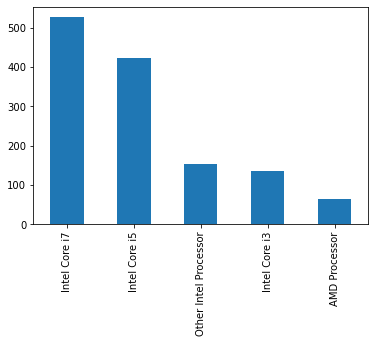

In [49]:
# check distrubtion of cpu brands
df["Cpu brand"].value_counts().plot(kind="bar")

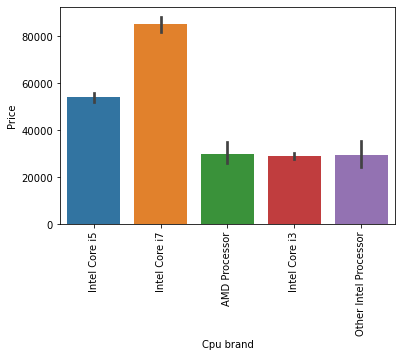

In [50]:
# and if we check and compare with price value
sns.barplot(x = df["Cpu brand"], y= df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [51]:
df.drop(columns=["Cpu", "Cpu name"], inplace=True)

In [52]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

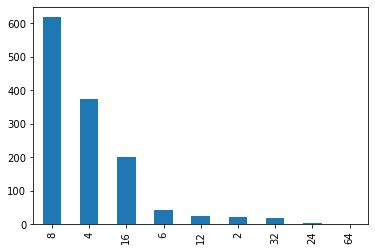

In [53]:
# check the value distribution for the RAM column
df["Ram"].value_counts().plot(kind="bar")

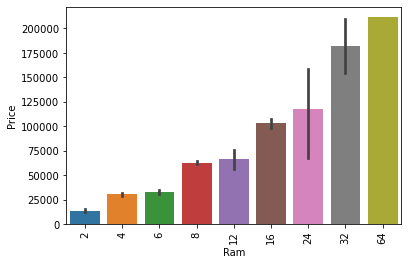

In [54]:
# and if we check and compare with price value
sns.barplot(x = df["Ram"], y= df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [55]:
# let's clean gpu brand column value
df["Gpu brand"] = df["Gpu"].apply(lambda x:x.split()[0])

In [56]:
# check the values now
df["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [57]:
df.drop(columns=["Gpu"], inplace=True)

In [58]:
# let's clean the OS value
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [59]:
def cat_os(text):
    if text == "Windows 10" or text == "Windows 7" or text == "Windows 10 S":
        return "Windows"
    elif text == "macOS" or text == "Mac OS X":
        return "Mac"
    else:
        return "Other OS"

In [60]:
df["os"] = df["OpSys"].apply(cat_os)

In [61]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Other OS
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


In [62]:
df.drop(columns=["OpSys"], inplace=True)

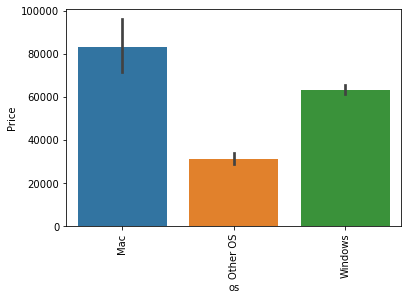

In [63]:
# check the value of OS against the price
sns.barplot(x = df["os"], y= df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<AxesSubplot:>

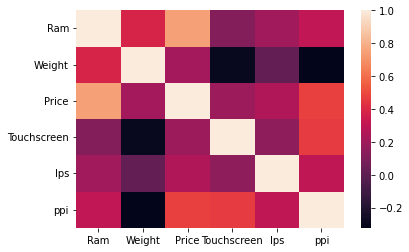

In [64]:
# heatmap
sns.heatmap(df.corr())

## Split data into Features and Target

In [65]:
X = df.drop(columns=["Price"])
y = df["Price"]

## Tran Test split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [67]:
X_train

,Company,TypeName,Ram,Memory,Weight,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
91,Acer,Notebook,8,1TB HDD,2.20,0,0,141.211998,Intel Core i7,Nvidia,Windows
940,HP,Gaming,8,128GB SSD + 1TB HDD,2.75,0,1,127.335675,Intel Core i5,Nvidia,Windows
1026,HP,Notebook,4,500GB HDD,2.31,0,0,111.935204,Intel Core i5,Intel,Windows
1257,Dell,Notebook,4,500GB HDD,2.29,0,0,100.454670,Intel Core i3,Intel,Windows
487,Dell,Notebook,16,512GB SSD,2.06,0,0,141.211998,Intel Core i7,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,500GB HDD,2.20,0,0,100.454670,Intel Core i3,Nvidia,Windows
299,Asus,Ultrabook,16,512GB SSD,1.63,0,0,141.211998,Intel Core i7,Nvidia,Windows
493,Acer,Notebook,8,1TB HDD,2.20,0,0,100.454670,AMD Processor,AMD,Windows
527,Lenovo,Notebook,8,2TB HDD,2.20,0,0,100.454670,Intel Core i3,Nvidia,Other OS


## Encoding Data

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [69]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [75]:
# let's start by isolation categorical variables (if present)
categorical_columns = [col for col in X.columns if X[col].dtype == "object"]
# categorical_columns_y = [col for col in y.columns if y[col].dtype == "object"]

In [76]:
categorical_columns

['Company', 'TypeName', 'Memory', 'Cpu brand', 'Gpu brand', 'os']

In [73]:
# isolate numerical variables (if present)
numerical_columns = [col for col in X.columns if X[col].dtype == "int64" or X[col].dtype == "float64"]
# numerical_columns_y = [col for col in y.columns if y[col] == "int64" or y[col] == "float64"]

In [74]:
numerical_columns

['Touchscreen', 'Ips', 'ppi']

In [ ]:
# define preprocessing steps
# 1) Manage missing values in numerical columns
# 2) Manage missing values and apply one-hot encoding in categorical columsn
# We'll use ColumnTransformer to group the objects that will apply transformation to our columns

In [79]:
# preprocessing for numerical data:
# only one step in this case - imputation for missing values
numerical_transformer = SimpleImputer()

In [86]:
# preprocessing for categorical data:
# two steps: missing values imputations, onehot encones
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

In [87]:
# bundle everything together in ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("numerical", numerical_transformer, numerical_columns),
    ("categorical", categorical_transformer, categorical_columns)
])

## LinearRegression model

In [97]:
# preprocessor complete, no it's time to load the model
model = LinearRegression()

In [98]:
# merging all together
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [99]:
# pass training data to the pipeline
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Touchscreen', 'Ips',
                                                   'ppi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'Memory', 'Cpu brand',
                                                   'Gpu brand', 'os'])])),
                ('model', LinearRegression())])

In [100]:
# create predictions
preds = final_pipeline.predict(X_test)

In [101]:
# evaluate model
print("r2 score is", r2_score(y_test, preds))
print("MAE score is", mean_absolute_error(y_test, preds))

r2 score is 0.6831586290503657
MAE score is 13038.985434721153


## Ridge Regression

In [107]:
# preprocessor complete, no it's time to load the model
model = Ridge(alpha=10)

In [108]:
# merging all together
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [109]:
# pass training data to the pipeline
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Touchscreen', 'Ips',
                                                   'ppi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'Memory', 'Cpu brand',
                                                   'Gpu brand', 'os'])])),
                ('model', Ridge(alpha=10))])

In [110]:
# create predictions
preds = final_pipeline.predict(X_test)

In [111]:
# evaluate model
print("r2 score is", r2_score(y_test, preds))
print("MAE score is", mean_absolute_error(y_test, preds))

r2 score is 0.7021437706005018
MAE score is 13161.081445025617


## Lasso Regression

In [112]:
# preprocessor complete, no it's time to load the model
model = Lasso(alpha=0.001)

In [113]:
# merging all together
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [114]:
# pass training data to the pipeline
final_pipeline.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50494991915.88434, tolerance: 152859580.44843352
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Touchscreen', 'Ips',
                                                   'ppi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'Memory', 'Cpu brand',
                                                   'Gpu brand', 'os'])])),
                ('model', Lasso(alpha=0.001))])

In [115]:
# create predictions
preds = final_pipeline.predict(X_test)

In [116]:
# evaluate model
print("r2 score is", r2_score(y_test, preds))
print("MAE score is", mean_absolute_error(y_test, preds))

r2 score is 0.6840805233958642
MAE score is 13018.284581063355


## KNN

In [117]:
# preprocessor complete, no it's time to load the model
model = KNeighborsRegressor(n_neighbors=3)

In [118]:
# merging all together
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [119]:
# pass training data to the pipeline
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Touchscreen', 'Ips',
                                                   'ppi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'Memory', 'Cpu brand',
                                                   'Gpu brand', 'os'])])),
                ('model', KNeighborsRegressor(n_neighbors=3))])

In [120]:
# create predictions
preds = final_pipeline.predict(X_test)

In [121]:
# evaluate model
print("r2 score is", r2_score(y_test, preds))
print("MAE score is", mean_absolute_error(y_test, preds))

r2 score is 0.7205558974985897
MAE score is 12131.278289655174


## SVM

In [122]:
# preprocessor complete, no it's time to load the model
model = SVR(kernel="rbf",C=10000, epsilon=0.1)

In [123]:
# merging all together
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [124]:
# pass training data to the pipeline
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Touchscreen', 'Ips',
                                                   'ppi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'Memory', 'Cpu brand',
                                                   'Gpu brand', 'os'])])),
                ('model', SVR(C=10000))])

In [125]:
# create predictions
preds = final_pipeline.predict(X_test)

In [126]:
# evaluate model
print("r2 score is", r2_score(y_test, preds))
print("MAE score is", mean_absolute_error(y_test, preds))

r2 score is 0.2650852778239904
MAE score is 19934.45511946664


## Random Forest

In [128]:
# preprocessor complete, no it's time to load the model
model = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

In [129]:
# merging all together
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [130]:
# pass training data to the pipeline
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Touchscreen', 'Ips',
                                                   'ppi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'Memory', 'Cpu brand',
                                                   'Gpu brand', 'os'])])),
                ('model',
                 RandomForestRegressor(max_depth=15, max_features=0.7

In [131]:
# create predictions
preds = final_pipeline.predict(X_test)

In [132]:
# evaluate model
print("r2 score is", r2_score(y_test, preds))
print("MAE score is", mean_absolute_error(y_test, preds))

r2 score is 0.7683359442748995
MAE score is 11067.135152926283


## Extra Trees

In [137]:
# preprocessor complete, no it's time to load the model
model = ExtraTreesRegressor()

In [138]:
# merging all together
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [139]:
# pass training data to the pipeline
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Touchscreen', 'Ips',
                                                   'ppi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'Memory', 'Cpu brand',
                                                   'Gpu brand', 'os'])])),
                ('model', ExtraTreesRegressor())])

In [140]:
# create predictions
preds = final_pipeline.predict(X_test)

In [141]:
# evaluate model
print("r2 score is", r2_score(y_test, preds))
print("MAE score is", mean_absolute_error(y_test, preds))

r2 score is 0.6103394630417194
MAE score is 12327.163169103449


## AdaBoost

In [142]:
# preprocessor complete, no it's time to load the model
model = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

In [143]:
# merging all together
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [144]:
# pass training data to the pipeline
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Touchscreen', 'Ips',
                                                   'ppi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'Memory', 'Cpu brand',
                                                   'Gpu brand', 'os'])])),
                ('model', AdaBoostRegressor(n_estimators=15))])

In [145]:
# create predictions
preds = final_pipeline.predict(X_test)

In [146]:
# evaluate model
print("r2 score is", r2_score(y_test, preds))
print("MAE score is", mean_absolute_error(y_test, preds))

r2 score is 0.49021787590095767
MAE score is 19714.850099715437


## GradientBoost

In [148]:
# preprocessor complete, no it's time to load the model
model = GradientBoostingRegressor(n_estimators=500)

In [149]:
# merging all together
final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [150]:
# pass training data to the pipeline
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', SimpleImputer(),
                                                  ['Touchscreen', 'Ips',
                                                   'ppi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'Memory', 'Cpu brand',
                                                   'Gpu brand', 'os'])])),
                ('model', GradientBoostingRegressor(n_estimators=500))])

In [151]:
# create predictions
preds = final_pipeline.predict(X_test)

In [152]:
# evaluate model
print("r2 score is", r2_score(y_test, preds))
print("MAE score is", mean_absolute_error(y_test, preds))

r2 score is 0.8103315018420854
MAE score is 10163.223277485477
